In [1]:
#Use Autoencoder to implement anomaly detection. Build the model by using: 
#a. Import required libraries 
#b. Upload / access the dataset 
#d. Decoder networks convert it back to the original input 
#e. Compile the models with Optimizer, Loss, and Evaluation Metricsz

In [2]:
#import libraries
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras import layers, models
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt


In [3]:
(x_train, _ ), (x_test, _)= mnist.load_data()
#normalize and astype
x_train= x_train.astype('float')/255
x_test= x_test.astype('float')/255

In [4]:
encoder= models.Sequential([
    layers.Flatten(input_shape=(28,28)),
    layers.Dense(32, activation='relu')
])

In [5]:
decoder= models.Sequential([
    layers.Dense(784, activation='sigmoid'),
    layers.Reshape((28,28))
])

In [6]:
#  d. Combine the encoder and decoder to create the autoencoder model:|
autoencoder= models.Sequential([encoder, decoder])

In [7]:
# e. Compile the models with optimizer, loss, and evaluation metrics:
autoencoder.compile(optimizer= 'adam', 
                   loss= 'mean_squared_error')

In [8]:
#model_fit
autoencoder.fit(x_train, x_train, epochs=10, batch_size=64, shuffle=True, validation_data=(x_test, x_test))


Epoch 1/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0420 - val_loss: 0.0226
Epoch 2/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0183 - val_loss: 0.0146
Epoch 3/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0132 - val_loss: 0.0116
Epoch 4/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0114 - val_loss: 0.0106
Epoch 5/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0108 - val_loss: 0.0103
Epoch 6/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0105 - val_loss: 0.0100
Epoch 7/10
938/938 [==============================] - 5s 5ms/step - loss: 0.0104 - val_loss: 0.0100
Epoch 8/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0103 - val_loss: 0.0100
Epoch 9/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0102 - val_loss: 0.0099
Epoch 10/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0102 - val_loss: 0.0099

In [9]:
decoded_imgs=autoencoder.predict(x_test) 

313/313 [==============================] - 1s 1ms/step


313/313 [==============================] - 1s 2ms/step


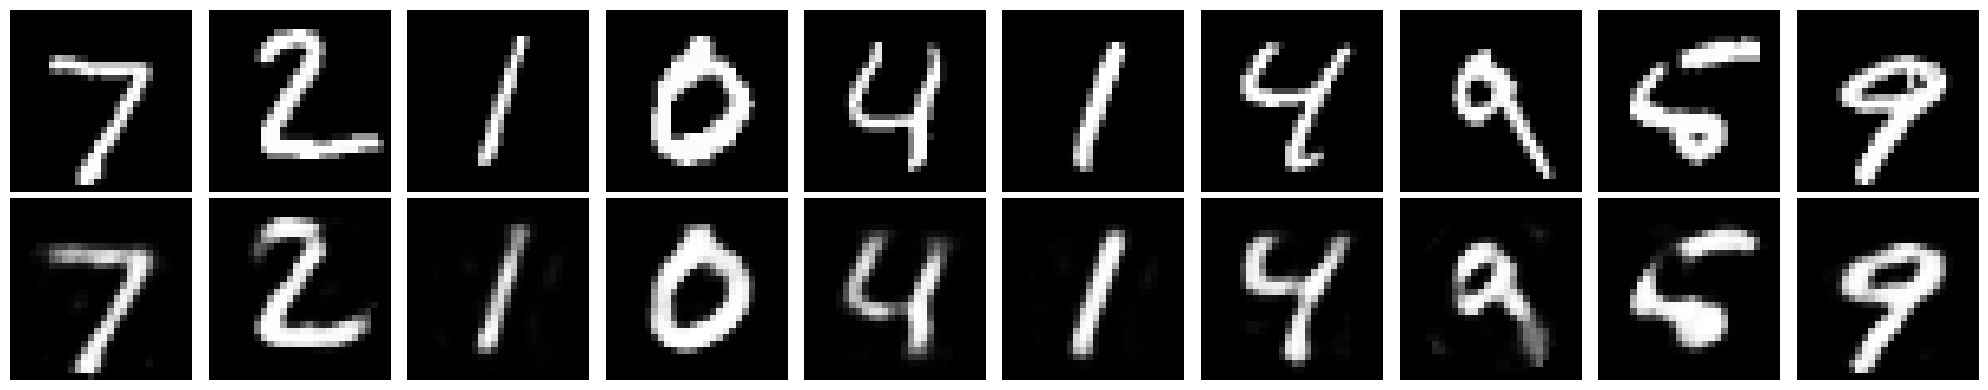

In [10]:
## Visualize original and reconstructed images
decoded_imgs = autoencoder.predict(x_test)
n = 10
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 4))

for i in range(n):
    plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.axis('off')

    plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    plt.axis('off')

plt.tight_layout()
plt.show()

